# eDreams test for Data Scientist Role

*__Autor:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*

# Index

1. [Imports](#1)   

2. [EDA](#2) <br>
    3.1 [Duplicate Check](#2.1)    
    3.2 [Target Variable Transformation](#2.2)    
    3.3 [Validation Strategy](#2.3)    
    3.4 [Data Cleaning & Transformation](#2.4)   
    3.5 [Dates conversion](#2.5)    
    3.6 [Label Encoding / One Hot Encoding](#2.6)       
    3.7 [Pickup Locations](#2.7)
     
3. [Feature Engineering](#3)    
    4.1 [Timing Features](#3.1)    
    
4. [Modeling](#4)    
    5.1 [Setting K folds](#4.1)        
    5.2 [Parameter tunning](#4.2)       
    5.4 [Get the id column](#4.4)  

5. [Submission](#5) 

<a id="1"></a>
### Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set() #Different type of visualization

# import the necessary modelling algorithms

# Classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,PolynomialFeatures

# Evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score  # for classification

# Show multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id="2"></a>
### EDA

In [2]:
# We import the data
df_train = pd.read_csv('input/train.csv', sep = ';')
df_test = pd.read_csv('input/test.csv', sep = ';')

# We take a look at the dataset to see that data was imported correctly
df_train.head()
df_test.head()

,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
0,0,01/July,EDES,1,22/July,25/July,1,0,0,False,DOMESTIC,"628,844",TABLET,ROUND_TRIP,TRIP,True,False,0
1,1,01/July,EDIT,0,29/July,29/July,1,0,0,False,CONTINENTAL,"1281,43",SMARTPHONE,ONE_WAY,TRIP,False,False,1
2,2,01/July,OPUK,2,29/July,19/August,1,0,0,False,CONTINENTAL,"1730,35",TABLET,ROUND_TRIP,TRIP,True,False,0
3,3,01/July,OPIT,0,24/July,04/August,1,0,0,False,DOMESTIC,"652,702",SMARTPHONE,MULTI_DESTINATION,TRIP,False,False,2
4,4,01/July,EDES,0,11/August,11/August,1,0,0,False,CONTINENTAL,"1717,85",COMPUTER,ONE_WAY,TRIP,False,False,1


,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,NO_GDS
0,0,03/July,EDES,1,22/July,22/July,1,0,0,False,DOMESTIC,"3425,95",COMPUTER,ONE_WAY,TRIP,True,0
1,1,03/July,GOFR,1,05/July,22/August,1,0,0,False,INTERCONTINENTAL,"3206,92",SMARTPHONE,ROUND_TRIP,TRIP,False,0
2,2,03/July,OPGB,1,22/July,12/August,1,0,0,False,INTERCONTINENTAL,"6605,22",COMPUTER,ROUND_TRIP,TRIP,False,0
3,3,03/July,EDUK,0,06/July,08/July,1,0,0,False,CONTINENTAL,"1302,29",SMARTPHONE,ROUND_TRIP,TRIP,False,2
4,4,03/July,OPDE,1,10/September,10/September,1,0,0,False,INTERCONTINENTAL,"6770,78",COMPUTER,ONE_WAY,TRIP,True,0


In [7]:
df_train.tail()

,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
49995,49995,02/July,EDUK,1,02/July,02/July,2,0,0,False,CONTINENTAL,"1035,13",COMPUTER,ONE_WAY,TRIP,True,True,0
49996,49996,02/July,EDPT,1,11/August,19/August,2,1,0,False,CONTINENTAL,"1152,2",SMARTPHONE,ROUND_TRIP,TRIP,True,False,0
49997,49997,02/July,GOFR,1,09/September,23/September,1,0,0,False,INTERCONTINENTAL,"2236,54",SMARTPHONE,ROUND_TRIP,TRIP,False,False,0
49998,49998,02/July,EDPT,2,05/July,21/July,1,0,0,False,CONTINENTAL,"1312,48",COMPUTER,ROUND_TRIP,TRIP,False,True,0
49999,49999,02/July,GOFR,0,06/July,06/July,1,0,0,False,INTERCONTINENTAL,"2403,31",SMARTPHONE,ONE_WAY,TRIP,False,False,1


In [3]:
# Let's check the number of rows and columns of train and test
print('We have {} training rows and {} test rows.'.format(df_train.shape[0], df_test.shape[0]))
print('We have {} training columns and {} test columns.'.format(len(df_train.columns), len(df_test.columns))) 

We have 50000 training rows and 30000 test rows.
We have 18 training columns and 17 test columns.


In [4]:
# We take a first look at the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
ID               50000 non-null int64
TIMESTAMP        50000 non-null object
WEBSITE          50000 non-null object
GDS              50000 non-null int64
DEPARTURE        50000 non-null object
ARRIVAL          50000 non-null object
ADULTS           50000 non-null int64
CHILDREN         50000 non-null int64
INFANTS          50000 non-null int64
TRAIN            50000 non-null bool
HAUL_TYPE        50000 non-null object
DISTANCE         50000 non-null object
DEVICE           49867 non-null object
TRIP_TYPE        50000 non-null object
PRODUCT          50000 non-null object
SMS              50000 non-null bool
EXTRA_BAGGAGE    50000 non-null bool
NO_GDS           50000 non-null int64
dtypes: bool(3), int64(6), object(9)
memory usage: 5.9+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
ID           30000 non-null int64
TIMESTAMP    30000 non-null object
WEBSITE      30000 non-null object
GDS          30000 non-null int64
DEPARTURE    30000 non-null object
ARRIVAL      30000 non-null object
ADULTS       30000 non-null int64
CHILDREN     30000 non-null int64
INFANTS      30000 non-null int64
TRAIN        30000 non-null bool
HAUL_TYPE    30000 non-null object
DISTANCE     30000 non-null object
DEVICE       29948 non-null object
TRIP_TYPE    30000 non-null object
PRODUCT      30000 non-null object
SMS          30000 non-null bool
NO_GDS       30000 non-null int64
dtypes: bool(2), int64(6), object(9)
memory usage: 3.5+ MB


We can see we have some missing values in the `DEVICE` column in the train dataset. Later on we will decide what to do with them. <br>

Regarding the `ID` column. It tells us the same as the index from our dataframe, hence it's not giving us any extra information and because of all the entries are independent between each other we can safely drop it.

In [8]:
# We drop the ID column both in the train & test datset
df_train = df_train.drop('ID',axis=1)
df_test = df_test.drop('ID',axis=1)

In [9]:
df_train.head()
df_test.head()

,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
0,01/July,EDES,1,22/July,25/July,1,0,0,False,DOMESTIC,"628,844",TABLET,ROUND_TRIP,TRIP,True,False,0
1,01/July,EDIT,0,29/July,29/July,1,0,0,False,CONTINENTAL,"1281,43",SMARTPHONE,ONE_WAY,TRIP,False,False,1
2,01/July,OPUK,2,29/July,19/August,1,0,0,False,CONTINENTAL,"1730,35",TABLET,ROUND_TRIP,TRIP,True,False,0
3,01/July,OPIT,0,24/July,04/August,1,0,0,False,DOMESTIC,"652,702",SMARTPHONE,MULTI_DESTINATION,TRIP,False,False,2
4,01/July,EDES,0,11/August,11/August,1,0,0,False,CONTINENTAL,"1717,85",COMPUTER,ONE_WAY,TRIP,False,False,1


,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,NO_GDS
0,03/July,EDES,1,22/July,22/July,1,0,0,False,DOMESTIC,"3425,95",COMPUTER,ONE_WAY,TRIP,True,0
1,03/July,GOFR,1,05/July,22/August,1,0,0,False,INTERCONTINENTAL,"3206,92",SMARTPHONE,ROUND_TRIP,TRIP,False,0
2,03/July,OPGB,1,22/July,12/August,1,0,0,False,INTERCONTINENTAL,"6605,22",COMPUTER,ROUND_TRIP,TRIP,False,0
3,03/July,EDUK,0,06/July,08/July,1,0,0,False,CONTINENTAL,"1302,29",SMARTPHONE,ROUND_TRIP,TRIP,False,2
4,03/July,OPDE,1,10/September,10/September,1,0,0,False,INTERCONTINENTAL,"6770,78",COMPUTER,ONE_WAY,TRIP,True,0


<a id="2.1"></a>
###### Duplicate Check

Let's check if there are any duplicates.

In [6]:
# We check if we have duplicates
df_train.duplicated().any()
df_test.duplicated().any()

False

False

It looks like we have no duplicates on the dataset, so one problem less!

Let's check if we are facing a balanced dataset:

In [13]:
df_train['EXTRA_BAGGAGE'].value_counts()

False    40201
True      9799
Name: EXTRA_BAGGAGE, dtype: int64

As we can see we are facing a desbalanced dataset.

In [10]:
df_train.columns

Index(['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
       'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
       'TRIP_TYPE', 'PRODUCT', 'SMS', 'EXTRA_BAGGAGE', 'NO_GDS'],
      dtype='object')

In [11]:
g = sns.pairplot(df_train, vars=['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
       'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
       'TRIP_TYPE', 'PRODUCT', 'SMS', 'NO_GDS'], hue='EXTRA_BAGGAGE')
plt.show(g)

ValueError: could not convert string to float: '01/July'

Error in callback <function flush_figures at 0x11bc37158> (for post_execute):


KeyboardInterrupt: 

<a id="3.1"></a>
#### Outliers Check

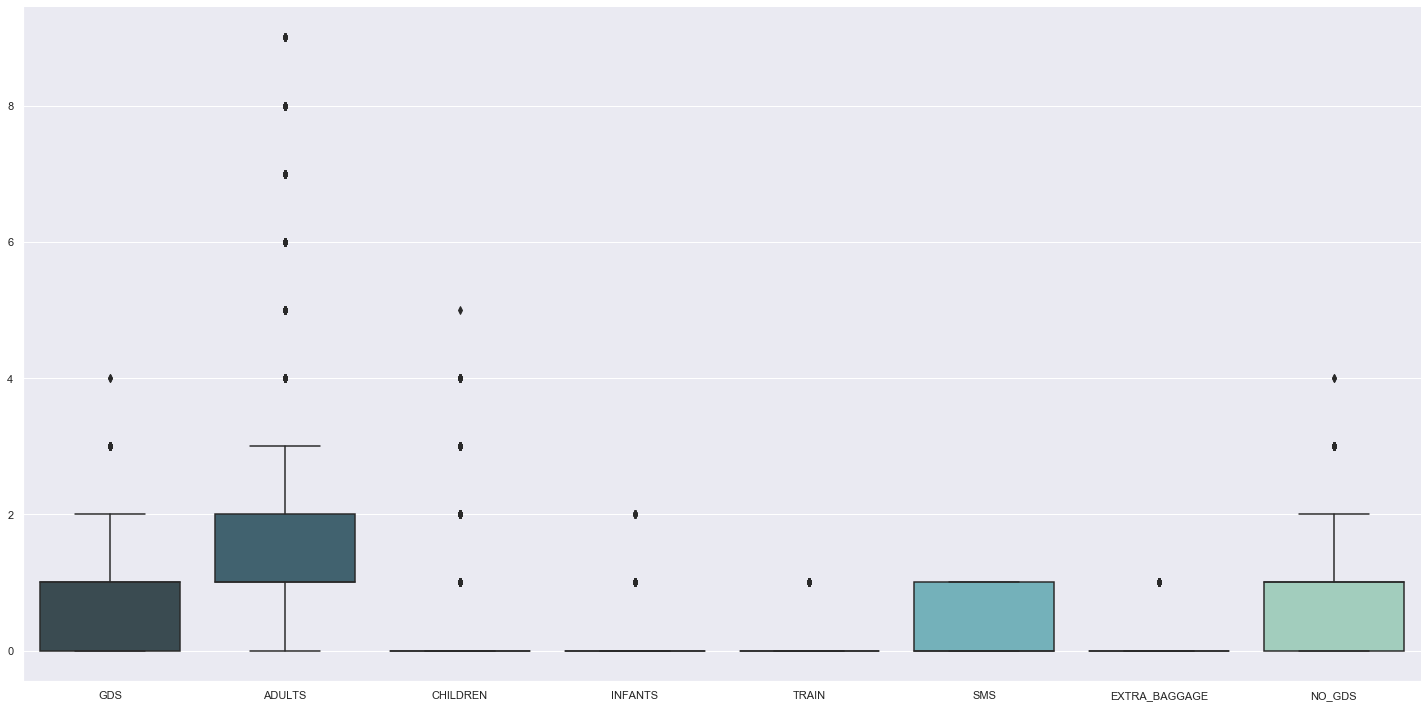

In [12]:
sns.catplot(data=df_train,kind='box',height=10,aspect=2, palette="GnBu_d");

## Greetings

I wanted to finish this test by giving thanks for the opportunity to work in such an amazing company that I have been looking up for many years now.<br>
It would be like a dream to be part of such an amazing project as I have been and it would be great to . <br>
I hope I left a good impresion and you take me into account for this position. 

I look forward to hearing from you.

Kind regards,

Tomas Ruan

*__Autor:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*